In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [37]:
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
family_income_data = pd.read_csv("C:\\Users\\mmnri\\Desktop\\Thesis.csv", na_values= '#DIV/0!' )
df = pd.DataFrame(family_income_data) 
df = df.apply(lambda x: pd.Series(x.dropna().values)).fillna(' ')


In [38]:
expenditures = [column for column in family_income_data.columns if 'Expenditure' in column]

In [39]:
X = family_income_data.loc[:, expenditures]
y = family_income_data['TOTEXP']
X 

,Saving by Month Expenditure,Monthly Household Income Expenditure,Monthly Food Expenditure,Monthly Bread and Cereals Expenditure,Monthly Rice Expenditure,Monthly Meat Expenditure,Monthly Fish and marine products Expenditure,Monthly Fruit Expenditure,Monthly Vegetables Expenditure,Monthly Restaurant and hotels Expenditure,Monthly Alcoholic Beverages Expenditure,Monthly Tobacco Expenditure,"Monthly Clothing, Footwear and Other Wear Expenditure",Monthly Housing and water Expenditure,Monthly Medical Care Expenditure,Monthly Transportation Expenditure,Monthly Communication Expenditure,Monthly Education Expenditure,Monthly Miscellaneous Goods and Services Expenditure,Monthly Special Occasions Expenditure
0,16722.666670,40027.666670,9820.666667,3511.666667,3191.666667,2056.333333,1400.500000,277.083333,1121.666667,250.000000,0.000000,0.000000,383.916667,5303.0,288.083333,398.0,240.0,3016.666667,2838.0,600.000000
1,-861.083333,16519.583330,5647.166667,1444.083333,1084.000000,1452.833333,922.750000,169.583333,652.750000,196.666667,80.000000,177.666667,685.833333,3447.5,293.333333,1075.0,475.0,2441.666667,762.5,125.000000
2,-1317.750000,6898.750000,5134.083333,2848.500000,2666.750000,648.583333,215.833333,144.166667,316.250000,378.750000,22.500000,377.083333,227.916667,1195.0,5.833333,27.0,35.0,35.416667,537.5,41.666667
3,-612.500000,8965.750000,6515.750000,2835.833333,2388.250000,909.500000,901.000000,57.500000,657.250000,523.333333,40.000000,0.000000,115.833333,1386.5,5.000000,570.0,55.0,25.000000,313.5,41.666667
4,6687.250000,15776.833330,7885.416667,2901.666667,2513.916667,1532.583333,942.416667,116.250000,938.333333,533.333333,86.666667,0.000000,385.000000,2593.5,11.666667,583.0,175.0,0.000000,706.0,83.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,2787.666667,9981.083333,3739.583333,1972.916667,1795.166667,123.000000,510.000000,136.000000,323.500000,150.416667,0.000000,11.083333,116.250000,1531.0,24.500000,177.0,50.0,4.166667,331.5,208.333333
41540,5010.750000,11443.333330,2596.416667,224.250000,106.083333,157.166667,365.500000,153.333333,259.166667,757.500000,0.000000,25.000000,261.333333,1470.0,74.166667,214.0,130.0,129.166667,507.5,125.000000
41541,8886.583333,11097.583330,3823.500000,2387.166667,2278.250000,40.000000,399.666667,102.666667,252.083333,277.500000,0.000000,0.000000,205.000000,770.0,45.000000,170.0,90.0,0.000000,297.5,41.666667
41542,1659.166667,10791.666670,6784.666667,2499.666667,2221.250000,196.583333,1477.500000,243.583333,662.583333,1138.333333,0.000000,52.500000,312.916667,1036.5,26.166667,201.0,85.0,441.250000,480.0,83.333333


In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, precision_score,recall_score, classification_report, confusion_matrix

KeyboardInterrupt: 

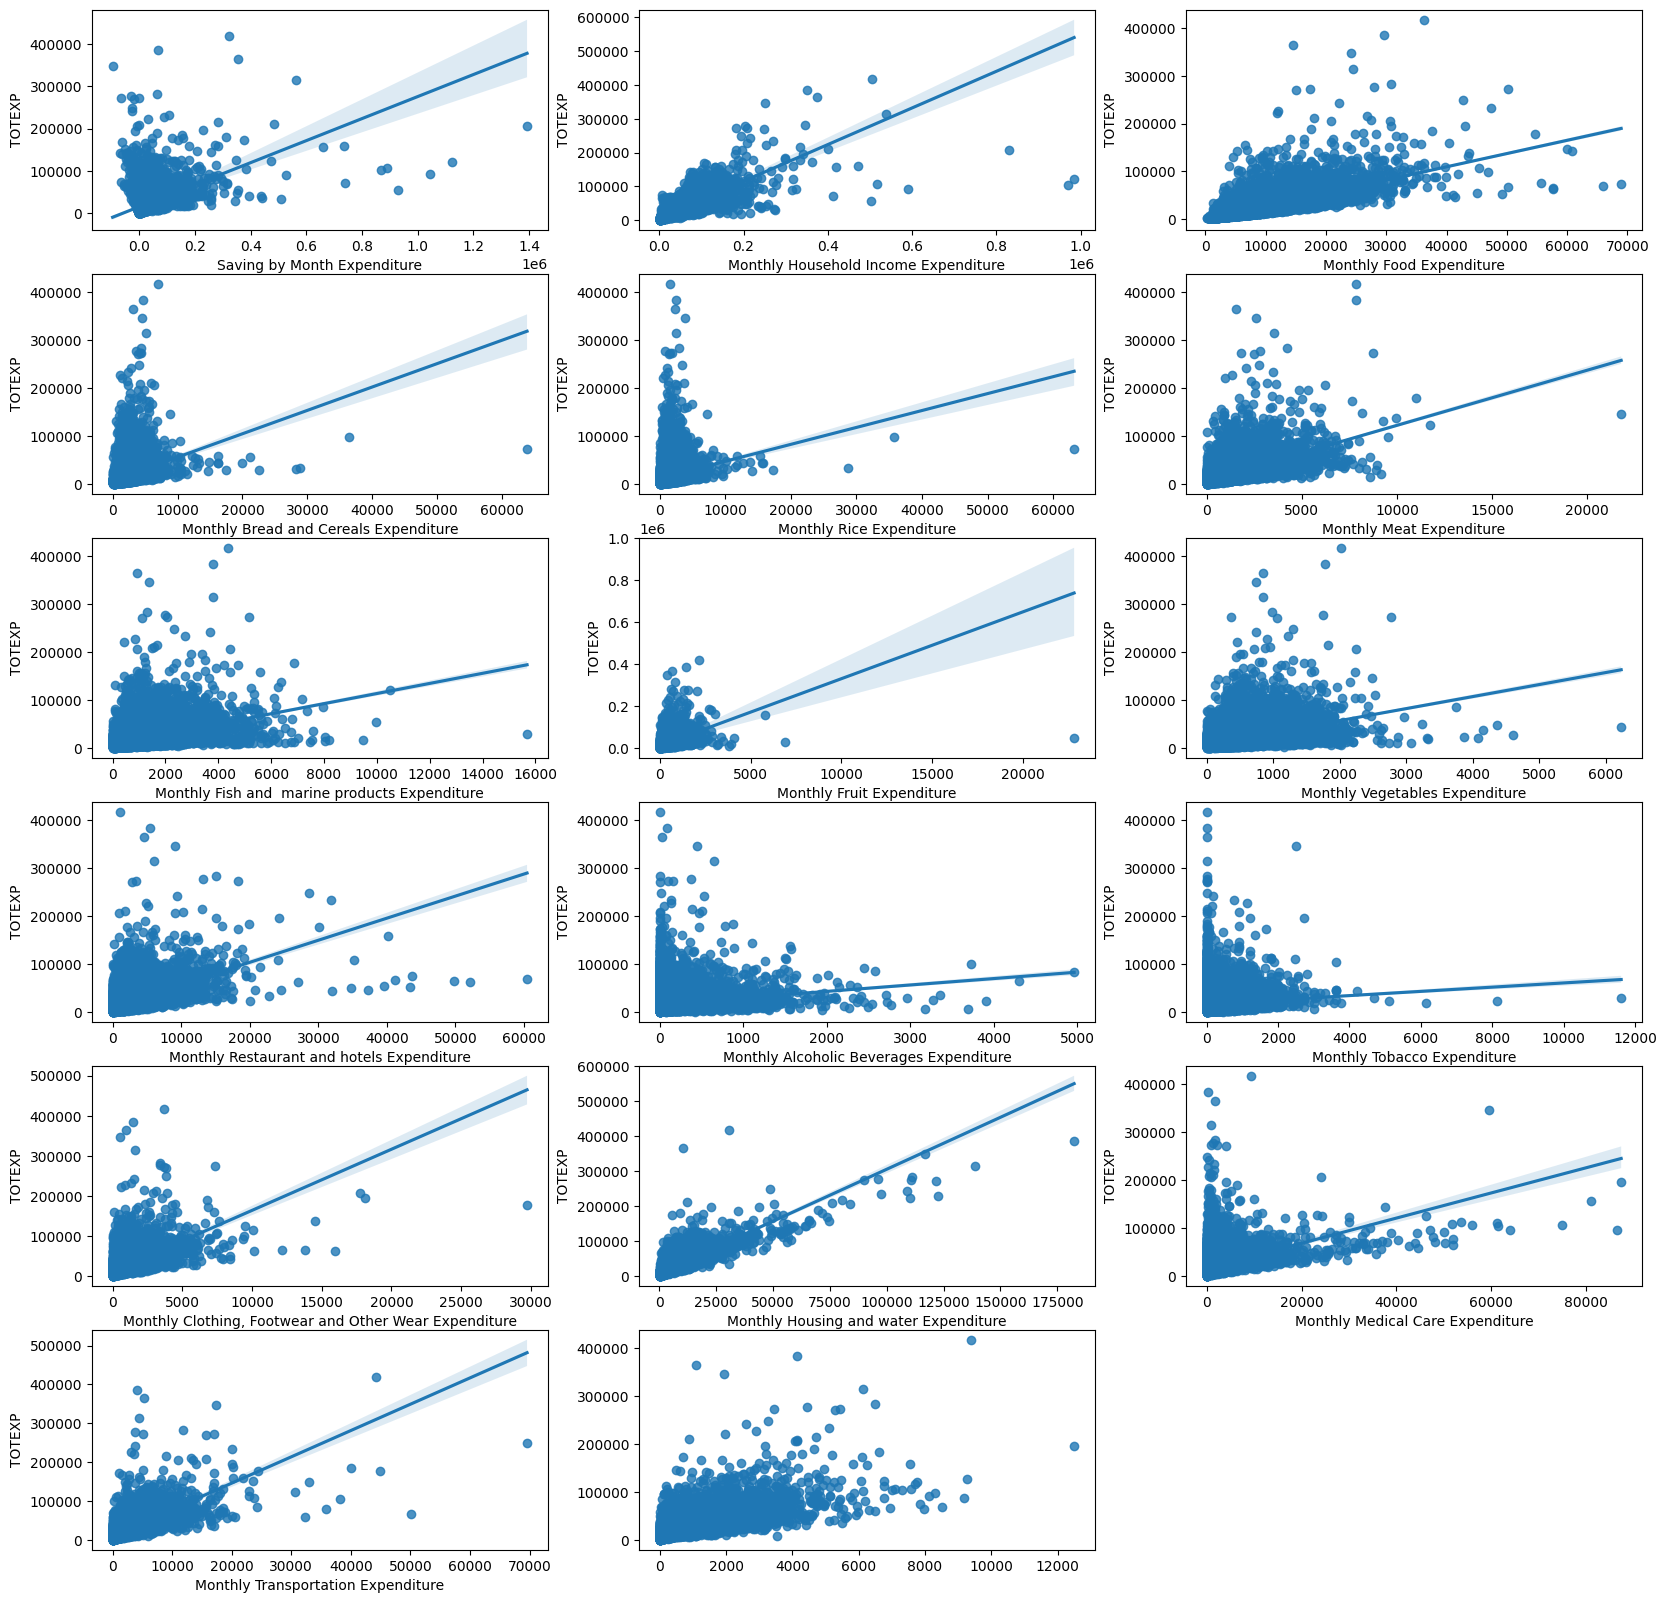

In [29]:
plt.figure(figsize=(20, 20))
i = 1
for exp in expenditures :
    plt.subplot(6,3,i)
    sns.regplot(x=X[exp], y=y)
    i += 1

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [46]:
rfr = RandomForestRegressor(verbose=True, n_jobs=-1, n_estimators=10)
rfr = RandomForestRegressor(oob_score=True)
rfr.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

C:\Users\mmnri\AppData\Local\Temp\ipykernel_12776\1972877160.py:29: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('Barplot.png')
C:\Users\mmnri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


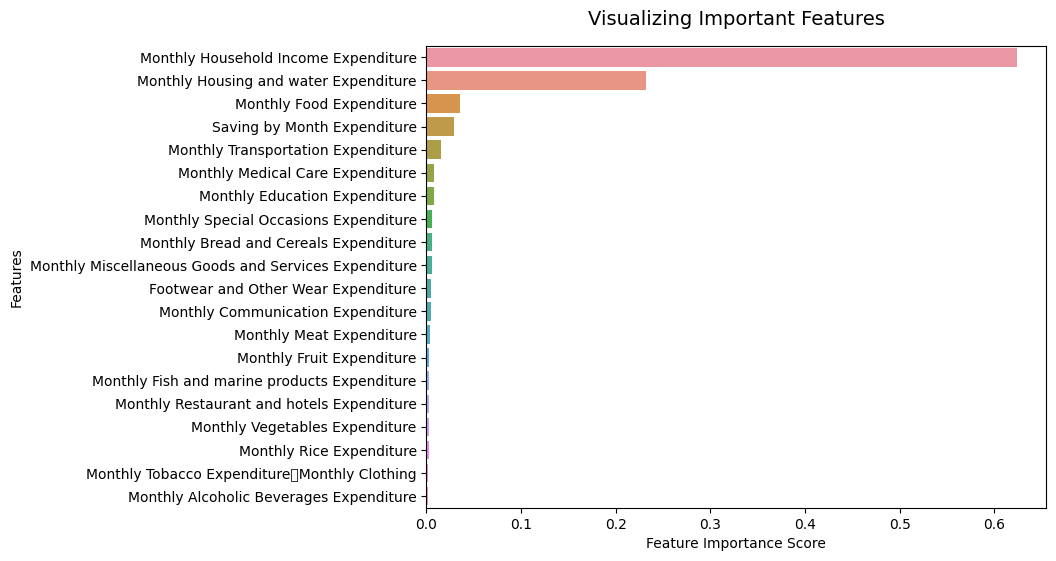

In [47]:
fig = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(rfr.feature_importances_, 
                        index=['Saving by Month Expenditure',
                               'Monthly Household Income Expenditure',
                               'Monthly Food Expenditure',
                               'Monthly Bread and Cereals Expenditure',
                               'Monthly Rice Expenditure',
                               'Monthly Meat Expenditure',
                               'Monthly Fish and marine products Expenditure',
                               'Monthly Fruit Expenditure',
                               'Monthly Vegetables Expenditure',
                               'Monthly Restaurant and hotels Expenditure',
                               'Monthly Alcoholic Beverages Expenditure',
                               'Monthly Tobacco Expenditure	Monthly Clothing',
                               'Footwear and Other Wear Expenditure',	
                               'Monthly Housing and water Expenditure',	
                               'Monthly Medical Care Expenditure',	
                               'Monthly Transportation Expenditure',	
                               'Monthly Communication Expenditure',	
                               'Monthly Education Expenditure',	
                               'Monthly Miscellaneous Goods and Services Expenditure',	
                               'Monthly Special Occasions Expenditure']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [48]:
rfr.oob_score_

0.9169480315153279

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


[Text(0.5, 0, 'Total Expenses'), Text(0, 0.5, 'Predicted Expenses')]

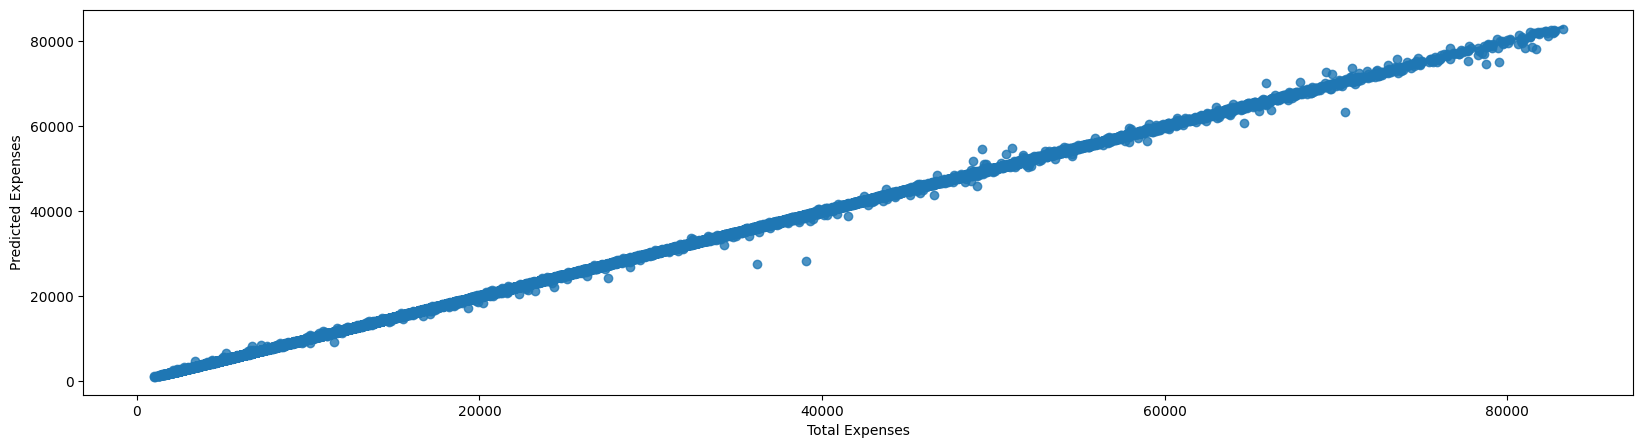

In [13]:
y_rfr_predict = rfr.predict(X)
mean_squared_error(y, y_rfr_predict)
plt.figure(figsize=(20,5))
ax = sns.regplot(x=y, y = y_rfr_predict)
ax.set(xlabel='Total Expenses', ylabel='Predicted Expenses')

In [14]:
rfr.score(X_test, y_test)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9998354084718639

In [15]:
from sklearn import metrics

y_pred = rfr.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))


MAE:  39.06459572844118
MSE:  19682.855067915854
RMSE:  140.29559889004307


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


In [61]:
rfr.estimators_[9].tree_.max_depth

rf = RandomForestRegressor(verbose=True, n_jobs=-1, n_estimators=10 , max_depth=4)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  2182.562684455683
MSE:  10045658.137619184
RMSE:  3169.4886239927073


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


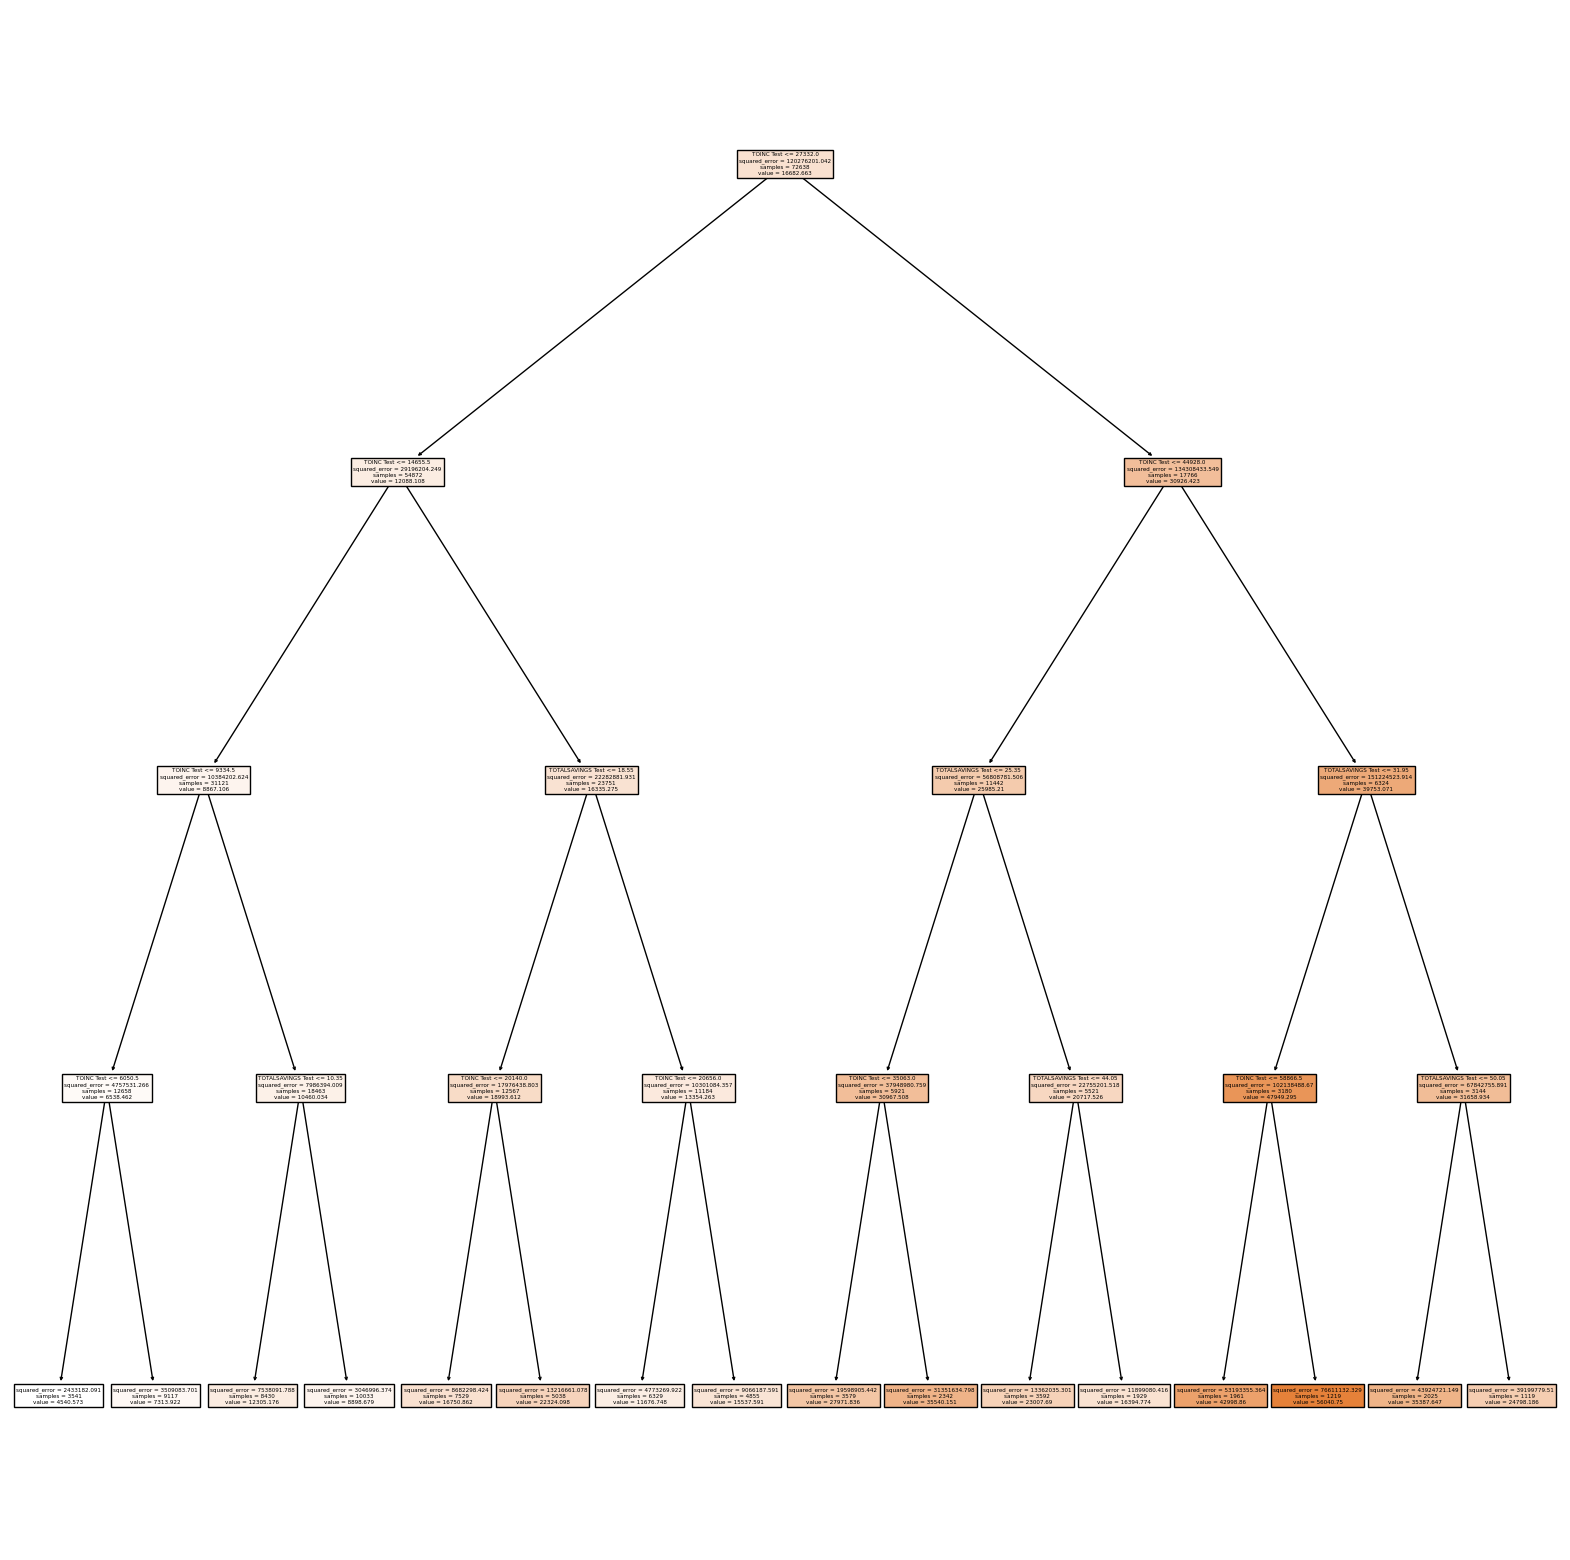

In [64]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf.estimators_[9], feature_names=X.columns, filled=True)

In [163]:
import pickle

In [164]:
pickle.dump(rfr,open('modelrfrExpenses.pkl', 'wb'))